Exercício 3 - Lista Final - Redes Neurais 

Importando as bibliotecas necessárias 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import cv2

Carregando o conjunto de dados da CIFAR 100


In [4]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

Vizualizando o shape dos dados

In [5]:
print(f"Shape do X_train: {X_train.shape}, Shape do y_train: {y_train.shape}")
print(f"Shape do X_test: {X_test.shape}, Shape do y_test: {y_test.shape}")

Shape do X_train: (50000, 32, 32, 3), Shape do y_train: (50000, 1)
Shape do X_test: (10000, 32, 32, 3), Shape do y_test: (10000, 1)


Listando o nome das classes do CIFAR 100

In [6]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
               'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
               'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
               'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo',
               'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree',
               'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
               'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit',
               'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper',
               'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
               'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe',
               'whale', 'willow_tree', 'wolf', 'woman', 'worm']

Selecionar duas Labels para aplicação do PCA

In [7]:
selected_classes = ['crocodile', 'dinosaur']
selected_indices = [class_names.index(label) for label in selected_classes]

Filtrando os dados para incluir apenas as duas classes selecionadas

In [8]:
train_filter = np.isin(y_train, selected_indices).flatten()
test_filter = np.isin(y_test, selected_indices).flatten()

In [9]:
X_train_filtered = X_train[train_filter]
y_train_filtered = y_train[train_filter]
X_test_filtered = X_test[test_filter]
y_test_filtered = y_test[test_filter]

Processo de Normalização dos dados

In [10]:
X_train_filtered = X_train_filtered.astype('float32') / 255.0
X_test_filtered = X_test_filtered.astype('float32') / 255.0

Codificando as Labels


In [11]:
# Converter para binário: 'crocodile' -> 0, 'dinosaur' -> 1
y_train_filtered = np.where(y_train_filtered == selected_indices[0], 0, 1)
y_test_filtered = np.where(y_test_filtered == selected_indices[0], 0, 1)

Verificando os shapes após a filtragem e codificação

In [12]:
print(f"Shape do X_train filtrado: {X_train_filtered.shape}, Shape do y_train filtrado: {y_train_filtered.shape}")
print(f"Shape do X_test filtrado: {X_test_filtered.shape}, Shape do y_test filtrado: {y_test_filtered.shape}")

Shape do X_train filtrado: (1000, 32, 32, 3), Shape do y_train filtrado: (1000, 1)
Shape do X_test filtrado: (200, 32, 32, 3), Shape do y_test filtrado: (200, 1)


Vizualizando algumas imagens e Labels

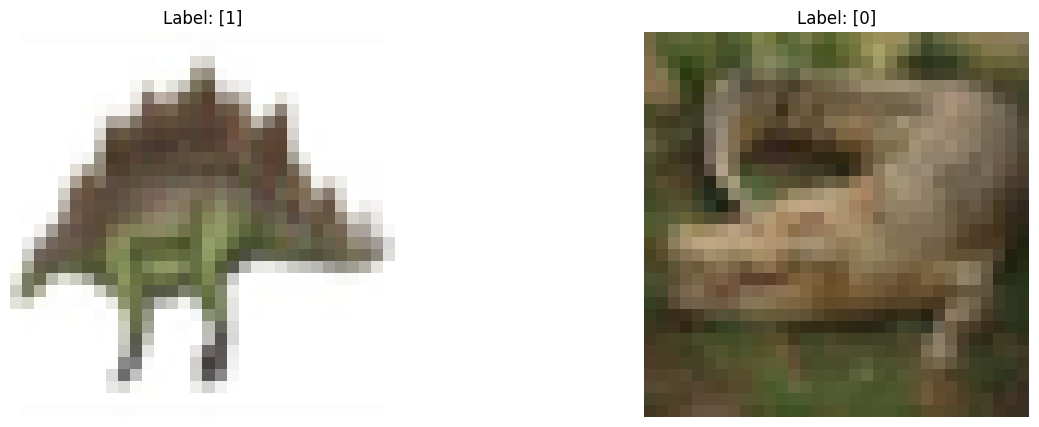

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i in range(2):
    axes[i].imshow(X_train_filtered[i])
    axes[i].set_title(f"Label: {y_train_filtered[i]}")
    axes[i].axis('off')
plt.show()

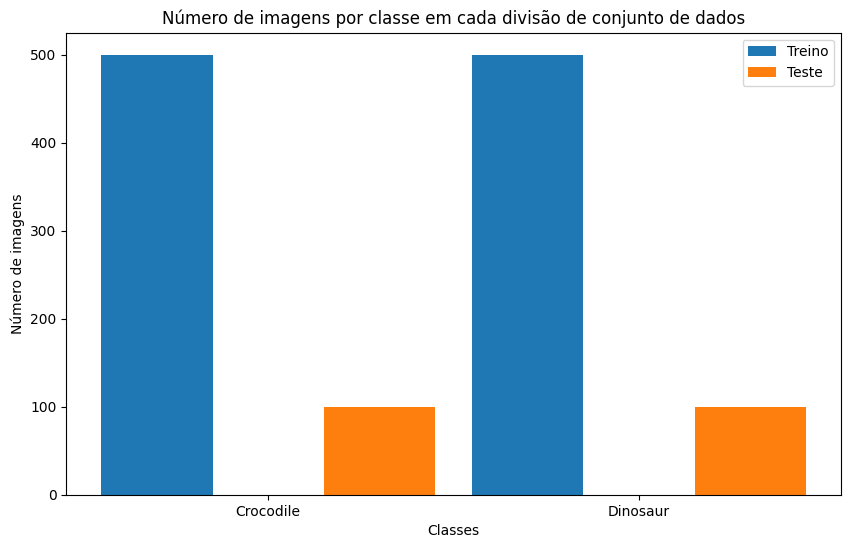

In [37]:
# Contar o número de imagens em cada etapa
train_counts = np.sum(y_train_filtered, axis=0)
test_counts = np.sum(y_test_filtered, axis=0)
classes = ['Crocodile', 'Dinosaur']

# Plotando as quantidades de imagens
plt.figure(figsize=(10, 6))

x = np.arange(len(classes))
width = 0.30

plt.bar(x - width, train_counts, width, label='Treino')
plt.bar(x + width, test_counts, width, label='Teste')

plt.xlabel('Classes')
plt.ylabel('Número de imagens')
plt.title('Número de imagens por classe em cada divisão de conjunto de dados')
plt.xticks(x, classes)
plt.legend()
plt.show()

Convertendo as imagens para escala de cinza

In [15]:
x_train_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_train_filtered])
x_test_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_test_filtered])

Remodelando os dados para 2D (requerido para PCA)

In [16]:
X_combined_reshaped = x_train_gray.reshape(x_train_gray.shape[0], -1)
X_test_combined_reshaped = x_test_gray.reshape(x_test_gray.shape[0], -1)

Aplicando PCA em todo o conjunto de dados filtrados

In [17]:
pca = PCA()
X_combined_pca = pca.fit_transform(X_combined_reshaped)

Avaliando os autovalores

In [18]:
autovalores = pca.explained_variance_
autovalores_ratio = pca.explained_variance_ratio_

Imprimindo os Autovalores

In [19]:
print(f"Autovalores: {autovalores}")
print(f"Percentual de variância explicada por cada componente: {autovalores_ratio}")
print(f"Variância explicada acumulada: {np.cumsum(autovalores_ratio)}")

Autovalores: [3.58302879e+01 4.87276793e+00 3.21552038e+00 2.56736255e+00
 1.60939872e+00 1.39677823e+00 1.29082310e+00 1.08803558e+00
 8.11393738e-01 7.26924717e-01 5.99095106e-01 5.57155132e-01
 5.43845236e-01 4.81342286e-01 4.46277738e-01 4.00037646e-01
 3.81915271e-01 3.54472697e-01 3.28143954e-01 3.24725360e-01
 3.08292687e-01 2.71833926e-01 2.59424984e-01 2.50282943e-01
 2.36437649e-01 2.22023830e-01 2.15549484e-01 2.09099278e-01
 2.04587117e-01 1.93856806e-01 1.88883379e-01 1.80860713e-01
 1.75452262e-01 1.65442616e-01 1.59836277e-01 1.57964289e-01
 1.49761572e-01 1.44640341e-01 1.43892139e-01 1.33055225e-01
 1.28694907e-01 1.28167450e-01 1.24367692e-01 1.18901514e-01
 1.17291033e-01 1.14382565e-01 1.11343391e-01 1.10204086e-01
 1.07092127e-01 1.01205140e-01 9.90050212e-02 9.59727541e-02
 9.27835852e-02 9.25223157e-02 9.00726393e-02 8.54999349e-02
 8.45952630e-02 8.30303207e-02 8.14777091e-02 8.06141570e-02
 7.88963512e-02 7.52559975e-02 7.43322894e-02 7.22813532e-02
 7.11960196

Visualizando os Autovalores

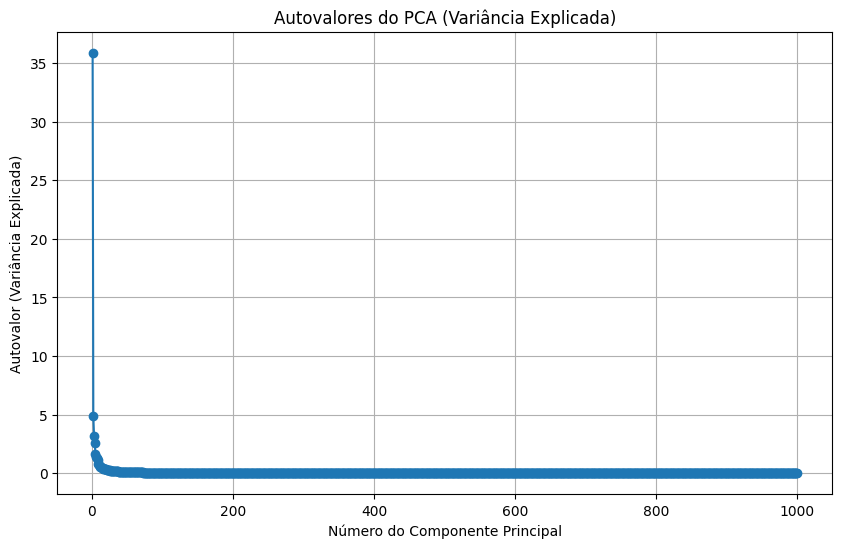

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(autovalores) + 1), autovalores, marker='o', linestyle='-')
plt.title('Autovalores do PCA (Variância Explicada)')
plt.xlabel('Número do Componente Principal')
plt.ylabel('Autovalor (Variância Explicada)')
plt.grid(True)
plt.show()

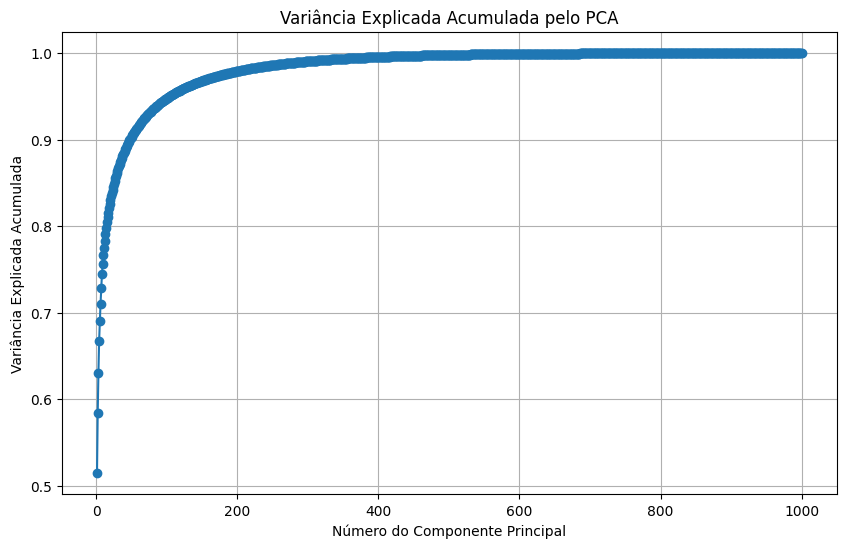

In [21]:
# Gráfico da variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(autovalores_ratio) + 1), np.cumsum(autovalores_ratio), marker='o', linestyle='-')
plt.title('Variância Explicada Acumulada pelo PCA')
plt.xlabel('Número do Componente Principal')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

Escolhendo o número de componentes principais (n_components) com base nos autovalores

In [22]:
# Por exemplo, manter componentes que explicam pelo menos 95% da variância total
n_components = np.argmax(np.cumsum(autovalores_ratio) >= 0.95) + 1
print(f"Número de componentes principais selecionados: {n_components}")

Número de componentes principais selecionados: 104


Aplicando PCA novamente com o número selecionado de componentes principais

In [23]:
pca_truncated = PCA(n_components=n_components)
X_train_pca_truncated = pca_truncated.fit_transform(X_combined_reshaped)
X_test_pca_truncated = pca_truncated.transform(X_test_combined_reshaped)



# Verificar as shapes após o truncamento
print(f"Shape do X_train após truncamento PCA: {X_train_pca_truncated.shape}")
print(f"Shape do X_test após truncamento PCA: {X_test_pca_truncated.shape}")

Shape do X_train após truncamento PCA: (1000, 104)
Shape do X_test após truncamento PCA: (200, 104)


Gráfico de dispersão

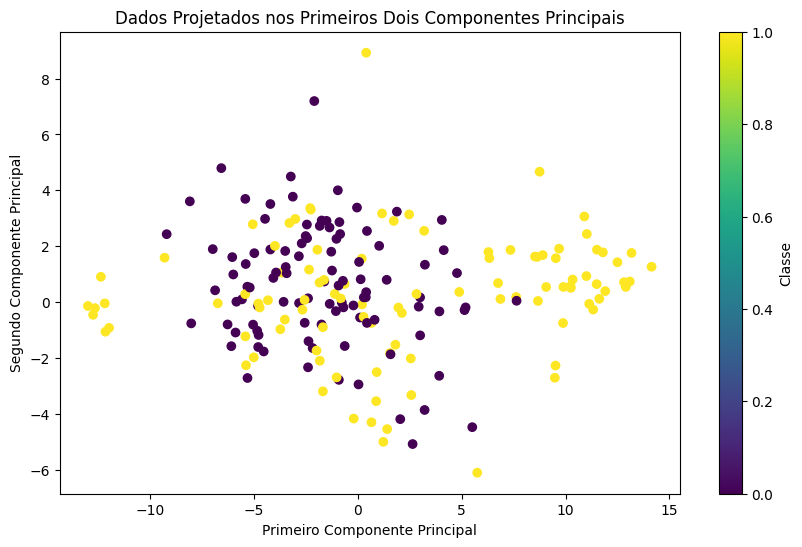

In [40]:
# Gráfico de dispersão dos dados no espaço PCA reduzido (usando os primeiros 2 componentes principais)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_pca_truncated[:, 0], X_test_pca_truncated[:, 1], c = y_test_filtered, cmap='viridis')
plt.title('Dados Projetados nos Primeiros Dois Componentes Principais')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.colorbar(scatter, label='Classe')
plt.grid(False)
plt.show()

Validação Cruzada com Múltiplas Divisões

In [25]:
# Configuração do K-Fold Cross-Validation com K = 4
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Inicializar o modelo LDA
lda = LinearDiscriminantAnalysis()

# Lista para armazenar acurácia de cada fold
accuracies = []

Iterando sobre cada fold

In [26]:
for train_index, test_index in kf.split(X_train_pca_truncated):
    # Separar dados de treino e teste
    X_train_fold, X_test_fold = X_train_pca_truncated[train_index], X_train_pca_truncated[test_index]
    y_train_fold, y_test_fold = y_train_filtered[train_index], y_train_filtered[test_index]
    
    # Treinar o modelo LDA nos dados de treinamento
    lda.fit(X_train_fold, y_train_fold.ravel())
    
    # Prever no conjunto de teste
    y_pred_fold = lda.predict(X_test_fold)
    
    # Calcular acurácia para o fold atual
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(accuracy)
    
    print(f"Acurácia do fold atual: {accuracy:.4f}")

# Calcular a acurácia média dos folds
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"\nAcurácia média após Validação Cruzada com {k} folds: {mean_accuracy:.4f}")
print(f"Desvio padrão da acurácia: {std_accuracy:.4f}")  

Acurácia do fold atual: 0.7080
Acurácia do fold atual: 0.6320
Acurácia do fold atual: 0.7080
Acurácia do fold atual: 0.6600

Acurácia média após Validação Cruzada com 4 folds: 0.6770
Desvio padrão da acurácia: 0.0325


In [27]:
val_predictions2 = lda.predict(X_test_pca_truncated)
accuracy2 = accuracy_score(y_test_filtered, val_predictions2)
print(accuracy2)

0.7


In [28]:
# Listas para armazenar as métricas por fold
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []
accuracy_per_fold = []

# Configuração do K-Fold Cross-Validation com K = 4
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Iterar sobre cada fold
for fold, (train_index, test_index) in enumerate(kf.split(X_test_combined_reshaped)):
    print(f"Fold {fold+1}/4")
    
    # Separar dados de treino e teste para este fold
    X_train_fold, X_test_fold = X_test_combined_reshaped[train_index], X_test_combined_reshaped[test_index]
    y_train_fold, y_test_fold = np.concatenate((y_train_filtered, y_test_filtered))[train_index], np.concatenate((y_train_filtered, y_test_filtered))[test_index]
    
    # Inicializar o modelo LDA
    lda = LinearDiscriminantAnalysis()
    
    # Aplicar Leave-One-Out dentro do fold de treino
    loo = LeaveOneOut()
    for loo_train_index, loo_test_index in loo.split(X_train_fold):
        X_loo_train, X_loo_test = X_train_fold[loo_train_index], X_train_fold[loo_test_index]
        y_loo_train, y_loo_test = y_train_fold[loo_train_index], y_train_fold[loo_test_index]
        lda.fit(X_loo_train, y_loo_train.ravel())
    
    # Treinar LDA em todo o conjunto de treino do fold
    lda.fit(X_train_fold, y_train_fold.ravel())
    
    # Fazer previsões no conjunto de teste deste fold
    y_pred_fold = lda.predict(X_test_fold)
    
    # Calcular as métricas para este fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_precision = precision_score(y_test_fold, y_pred_fold, average='weighted')
    fold_recall = recall_score(y_test_fold, y_pred_fold, average='weighted')
    fold_f1_score = f1_score(y_test_fold, y_pred_fold, average='weighted')
    
    # Armazenar as métricas
    accuracy_per_fold.append(fold_accuracy)
    precision_per_fold.append(fold_precision)
    recall_per_fold.append(fold_recall)
    f1_score_per_fold.append(fold_f1_score)
    
    print(f"  Acurácia: {fold_accuracy:.4f}")
    print(f"  Precisão: {fold_precision:.4f}")
    print(f"  Recall: {fold_recall:.4f}")
    print(f"  F1-Score: {fold_f1_score:.4f}\n")

# Resultados finais
print("Métricas por Fold:")
print(f"Acurácia Média por Fold: {np.mean(accuracy_per_fold):.4f}")
print(f"Precisão Média por Fold: {np.mean(precision_per_fold):.4f}")
print(f"Recall Médio por Fold: {np.mean(recall_per_fold):.4f}")
print(f"F1-Score Médio por Fold: {np.mean(f1_score_per_fold):.4f}")

Fold 1/4
  Acurácia: 0.6200
  Precisão: 0.6488
  Recall: 0.6200
  F1-Score: 0.6131

Fold 2/4
  Acurácia: 0.6400
  Precisão: 0.6389
  Recall: 0.6400
  F1-Score: 0.6353

Fold 3/4
  Acurácia: 0.5600
  Precisão: 0.5722
  Recall: 0.5600
  F1-Score: 0.5579

Fold 4/4
  Acurácia: 0.5000
  Precisão: 0.4938
  Recall: 0.5000
  F1-Score: 0.4870

Métricas por Fold:
Acurácia Média por Fold: 0.5800
Precisão Média por Fold: 0.5884
Recall Médio por Fold: 0.5800
F1-Score Médio por Fold: 0.5733


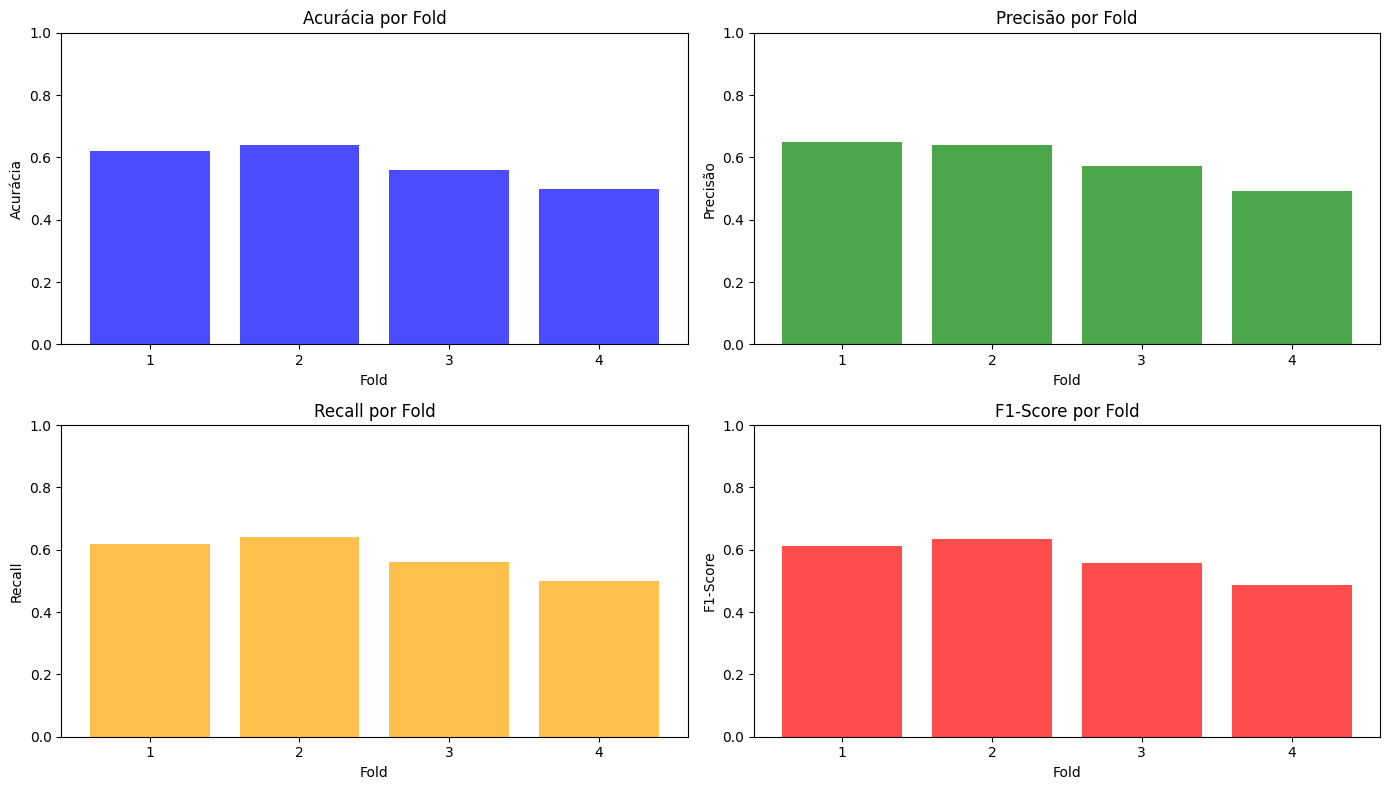

In [29]:
# Número de folds
folds = np.arange(1, 5)

# Criar gráficos para cada métrica
plt.figure(figsize=(14, 8))

# Gráfico de Acurácia
plt.subplot(2, 2, 1)
plt.bar(folds, accuracy_per_fold, color='blue', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.title('Acurácia por Fold')
plt.xticks(folds)  # Garantir que os ticks do eixo X sejam inteiros

# Gráfico de Precisão
plt.subplot(2, 2, 2)
plt.bar(folds, precision_per_fold, color='green', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel('Fold')
plt.ylabel('Precisão')
plt.title('Precisão por Fold')
plt.xticks(folds)  # Garantir que os ticks do eixo X sejam inteiros

# Gráfico de Recall
plt.subplot(2, 2, 3)
plt.bar(folds, recall_per_fold, color='orange', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.title('Recall por Fold')
plt.xticks(folds)  # Garantir que os ticks do eixo X sejam inteiros

# Gráfico de F1-Score
plt.subplot(2, 2, 4)
plt.bar(folds, f1_score_per_fold, color='red', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.title('F1-Score por Fold')
plt.xticks(folds)  # Garantir que os ticks do eixo X sejam inteiros

plt.tight_layout()
plt.show()

Gerando a matriz de confusão

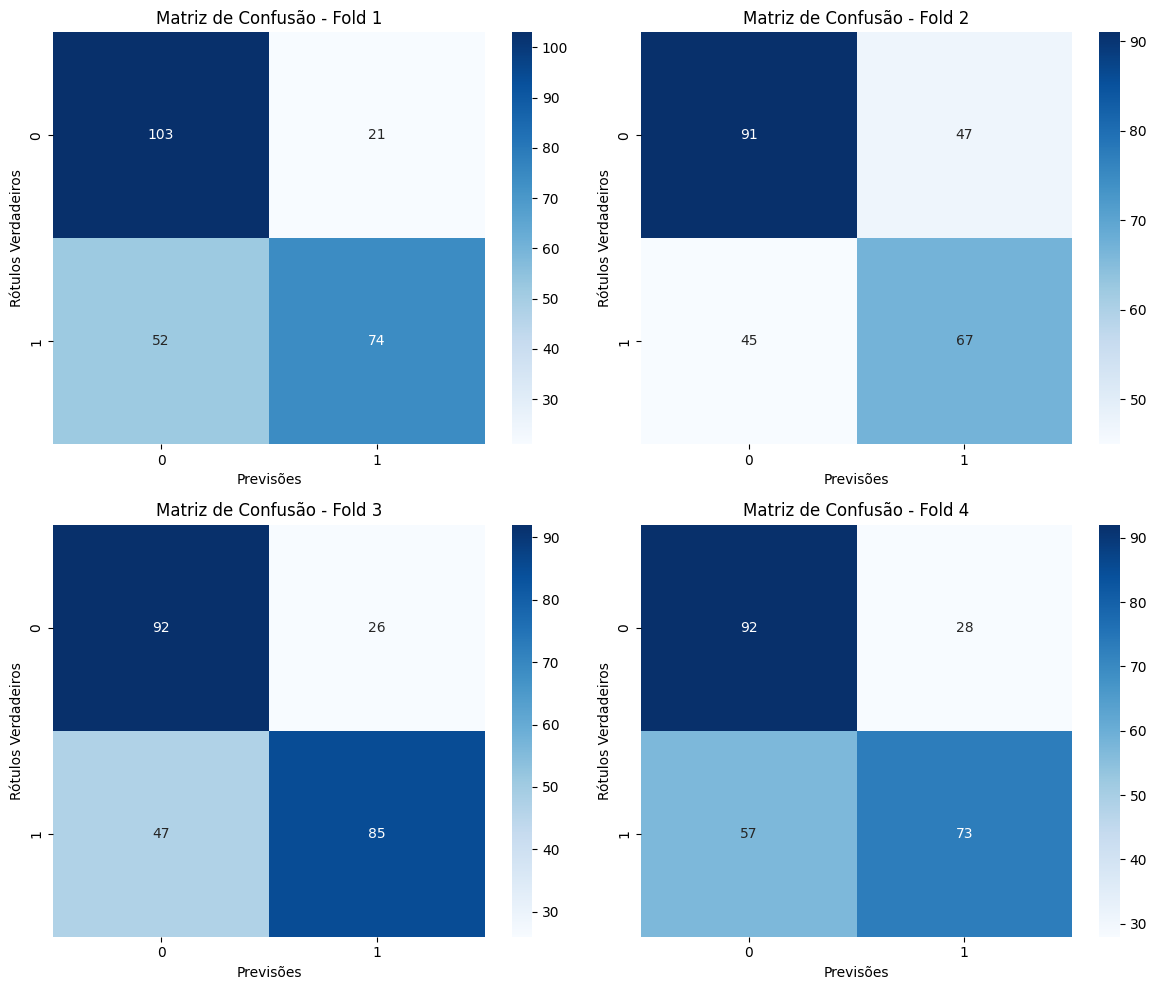

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Número de folds
n_folds = 4

# Criar uma figura com múltiplos subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Iterar sobre cada fold para gerar a matriz de confusão
for fold, (train_index, test_index) in enumerate(kf.split(X_train_pca_truncated)):
    # Separar dados de treino e teste para este fold
    X_train_fold, X_test_fold = X_train_pca_truncated[train_index], X_train_pca_truncated[test_index]
    y_train_fold, y_test_fold = y_train_filtered[train_index], y_train_filtered[test_index]
    
    # Treinar o modelo LDA no conjunto completo de treino do fold
    lda.fit(X_train_fold, y_train_fold.ravel())
    
    # Fazer previsões no conjunto de teste deste fold
    y_pred_fold = lda.predict(X_test_fold)
    
    # Gerar a matriz de confusão
    conf_matrix = confusion_matrix(y_test_fold, y_pred_fold)
    
    # Plotar a matriz de confusão
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train_filtered), yticklabels=np.unique(y_train_filtered), ax=axes[fold])
    axes[fold].set_xlabel('Previsões')
    axes[fold].set_ylabel('Rótulos Verdadeiros')
    axes[fold].set_title(f'Matriz de Confusão - Fold {fold+1}')

# Ajustar o layout
plt.tight_layout()
plt.show()



Letra B

Aplicando SVM linear

In [31]:
from sklearn.svm import SVC
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train_pca_truncated, y_train_filtered)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [32]:
pesos = clf_linear.support_vectors_

In [33]:
pesos

array([[ 7.06379190e-02, -7.69171476e-01,  9.37044621e-01, ...,
        -1.12538956e-01,  2.89076325e-02,  3.87760787e-03],
       [-4.21034908e+00,  4.22130793e-01,  7.99178798e-03, ...,
        -1.65583521e-01,  1.69247959e-03, -1.28244281e-01],
       [-7.57363653e+00,  2.27822065e+00,  8.30217123e-01, ...,
        -9.07616541e-02, -4.11121994e-01,  1.11556537e-01],
       ...,
       [ 9.31236553e+00,  7.10333437e-02,  2.66125774e+00, ...,
         4.32533026e-02, -2.73882955e-01, -1.52298972e-01],
       [ 1.12898731e+01,  2.21718743e-01,  1.41432846e+00, ...,
        -1.28360614e-01, -1.54424384e-01, -3.51888150e-01],
       [-1.21393096e+00, -1.34784579e+00,  9.56206560e-01, ...,
         3.15252632e-01,  5.08895256e-02, -1.47866011e-01]])

In [34]:
# Calcular o módulo (norma) de cada vetor
norms = np.linalg.norm(pesos, axis=0)

# Ordenar os índices dos vetores com base no módulo em ordem decrescente
sorted_indices = np.argsort(norms)[::-1]

pca_base = pca.components_

# Ordenar os vetores de suporte com base nos índices ordenados
pca_base_ordenado = pca_base[sorted_indices]

projetando dados na nova base

In [35]:
X_train_dpca = np.transpose(np.dot(pca_base_ordenado,np.transpose(X_combined_reshaped)))
X_teste_dpca = np.transpose(np.dot(pca_base_ordenado,np.transpose(X_test_combined_reshaped)))

Aplicando um KSVM

In [36]:
kf2 = KFold(n_splits=4, shuffle=True, random_state=42)

# lista para armazenar os modelos
svm_kernel = []

kernels = ['poly']

# itera sobre cada fold
for i, ker in enumerate(kernels):


    print(f"Utilizando o kernel {ker} no SVM:")


    for train_index, test_index in kf2.split(X_train_dpca):
        
        X_train4, X_val = X_train_dpca[train_index], X_train_dpca[test_index]
        y_train4, y_val = y_train_filtered[train_index], y_train_filtered[test_index]
        # cria e treinar o modelo SVM
        clf_kernel = SVC(kernel=ker)
        clf_kernel.fit(X_train4, y_train4.ravel())

        svm_kernel.append(clf_kernel)
        

        print('====================================================')
        
        # avalia o modelo no conjunto de validação
        accuracy3 = clf_kernel.score(X_val, y_val)
        print(f"Acurácia da validaçao no fold {i+1}: {accuracy3:.2f}")
        
        # avalia o modelo no conjunto de teste
        accuracy4 = clf_kernel.score(X_teste_dpca, y_test_filtered)
        print(f"Acurácia do teste no fold {i+1}: {accuracy4:.2f}")

Utilizando o kernel poly no SVM:
Acurácia da validaçao no fold 1: 0.68
Acurácia do teste no fold 1: 0.70
Acurácia da validaçao no fold 1: 0.73
Acurácia do teste no fold 1: 0.71
Acurácia da validaçao no fold 1: 0.74
Acurácia do teste no fold 1: 0.71
Acurácia da validaçao no fold 1: 0.69
Acurácia do teste no fold 1: 0.72
